In [2]:
#importing liabraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
#import dataset
data=pd.read_csv('company_data.csv')

In [4]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.loc[data["Sales"] <= 10.00,"Sales1"]="Not High"
data.loc[data["Sales"] >= 10.01,"Sales1"]="High"

In [8]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


## label encoding

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [10]:
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])
data["Sales1"] = label_encoder.fit_transform(data["Sales1"])

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [12]:
#split the data into dependant and independant variable
x = data.iloc[:,1:10]
y = data['Sales1']

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [14]:
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales1, Length: 400, dtype: int32

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50) 

## building decision tree classifier using entropy criteria

In [16]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
model.get_n_leaves()

8

In [18]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    70
0    10
dtype: int64

In [19]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales1,,
0,7,11
1,3,59


In [21]:
# Accuracy 
np.mean(preds==y_test)

0.825

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[ 7  3]
 [11 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.95      0.84      0.89        70

    accuracy                           0.82        80
   macro avg       0.67      0.77      0.70        80
weighted avg       0.88      0.82      0.84        80

Accuracy: 0.825


Text(0.5, 1.0, 'Decision tree using Entropy')

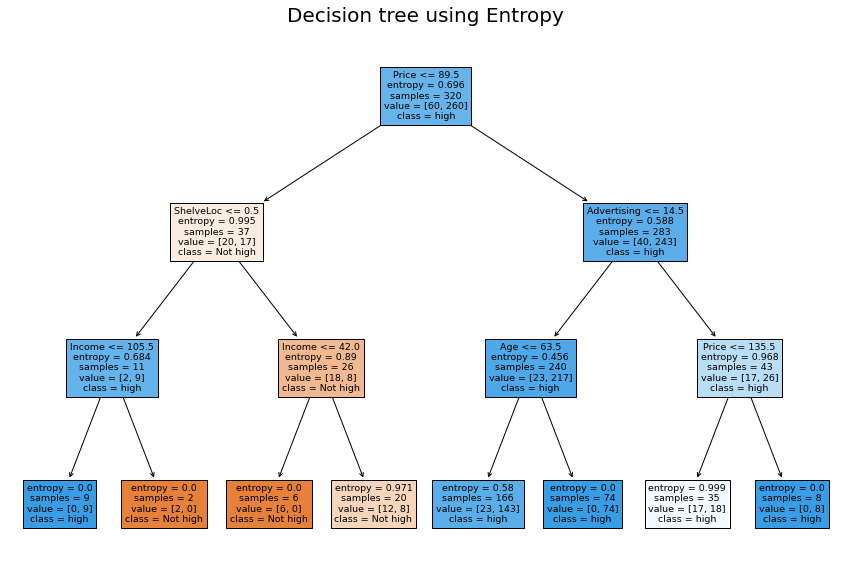

In [23]:
fig = plt.figure(figsize=(15,10))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['Not high', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=20)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
model_gini.get_n_leaves()

8

In [27]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    68
0    12
dtype: int64

In [28]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# Accuracy 
np.mean(preds==y_test)

0.8

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)


Confusion Matrix:
[[ 7  5]
 [11 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.92      0.84      0.88        68

    accuracy                           0.80        80
   macro avg       0.65      0.71      0.67        80
weighted avg       0.84      0.80      0.82        80

Accuracy: 0.8


Text(0.5, 1.0, 'Decision tree using gini')

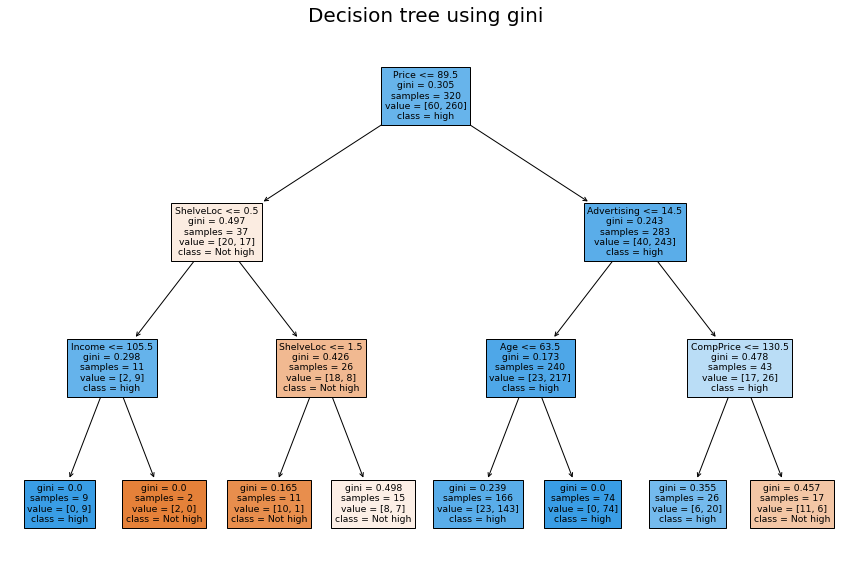

In [31]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(15,10))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['Not high', 'high'], filled=True)
plt.title('Decision tree using gini',fontsize=20)

## Building Decision Tree Regression

In [32]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [33]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
preds = model_R.predict(x_test) 
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

In [35]:
np.mean(preds==y_test)

0.8125